# LinearReg  Test
***
In this notebook, I'll try to use my linear regression implementation (LinearReg) over a simple 2-features dataset

First of all, we import:
1. *numpy* for linear algebra (matrix handling) though it's not required, it's already imported by LinearReg
2. *matplotlib.pyplot* to do some plotting and see the results
3. *pandas* to load the data from a csv file
4. *LinearReg* (personal implementation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LinearReg import LinearReg as lr

Using pandas we'll load our data:

In [2]:
data = pd.read_csv('./datasets/LinearReg.csv')

Let's see how it looks like

In [3]:
data.head(4)

,ID,x,y
0,0,0.0000,5.59209
1,1,0.4450,6.13800
2,2,0.6230,6.69600
3,3,1.2727,6.78900


For better insight and since the data consists of one feature only, we can plot it and see how y varies according to x, to do so, first we convert our DataFrame to a numpy array (cutting the ID column) and then plot using *pyplot*:

In [4]:
np_data = data.to_numpy()
inp = np_data[:, 1] # 2nd colunm
out = np_data[:, 2] # 3rd column
print(inp) 
print(out)

[0.       0.445    0.623    1.2727   1.78     2.225    2.67     3.115
 3.56     4.005    4.45     4.895    5.34     5.251    6.4347   6.675
 6.7284   0.       0.445    0.89     1.335    1.78     2.225    3.026
 3.115    3.56     3.649    4.45     5.2243   5.34     5.645626 6.23
 6.43826  7.12     0.       0.445    0.89     1.335    1.78     2.225
 2.67     3.115    3.56     4.005    4.45     4.895    4.8327   5.9363
 6.23     6.497    7.12    ]
[ 5.59209  6.138    6.696    6.789    7.533    7.905    8.463    8.69085
  9.3093   9.9231  10.3416  11.16    11.532   11.625   12.10116 12.834
 14.1639   5.3661   5.8311   6.2961   6.7611   7.2261   7.6911   8.1561
  8.6211   9.0861   9.5511  10.0161  10.4811  10.9461  11.4111  11.8761
 12.3411  12.8061   5.59209  6.138    6.696    6.789    7.533    7.8585
  8.463    8.69085  9.5976   9.9231  10.3416  11.16    11.532   11.625
 12.10116 12.4899  14.1639 ]


Now let's plot:

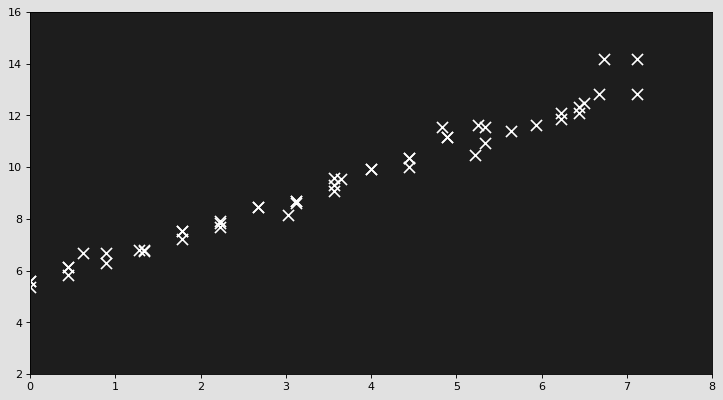

In [5]:
fig = plt.figure(figsize=(11, 6), dpi=80, facecolor='#e1e1e1')
ax = fig.add_subplot(111)
ax.set_facecolor('#1d1d1d')

ax.scatter(inp, out, marker='x', c='w', s=100)

plt.ylim((2, 16))
plt.xlim((0, 8))

plt.show()

As we can easily observe, the data can be fit with a linear function, to train our model, first we'll need to add the bias column:

In [6]:
X = inp.reshape(-1, 1) # make matrix
X = np.insert(X, [0], 1, axis=1) # add bias ~ 1 feature
y = out

print(X.shape)
print(X[:5, :]) # see the bias ~ column

(51, 2)
[[1.     0.    ]
 [1.     0.445 ]
 [1.     0.623 ]
 [1.     1.2727]
 [1.     1.78  ]]


Then we create a *LinearReg* model and fit the data, the solver uses stochastic gradient-descent though you can set a custom batch_size i.e. to use full gradient-descent you can just set batch_size to the number of samples in the training data (X.shape[0] here):

In [7]:
model = lr().fit(X, y, verbose=1, tol=1e-3, learning_rate=0.11, regularization_rate=0, max_iter=1000,
                batch_size = X.shape[0])
training_accuracy, d_avg = model.score(X, y, tol=0.8)
print('training_accuracy = ', training_accuracy, 'average distance = ', d_avg)

iteration  0  error =  42.96025663526839
iteration  1  error =  39.77319435277572
iteration  2  error =  36.82402651637168
iteration  3  error =  34.09493208256782
iteration  4  error =  31.56942866077218
iteration  5  error =  29.232271749990137
iteration  6  error =  27.069361572070676
iteration  7  error =  25.067656928120467
iteration  8  error =  23.215095548022877
iteration  9  error =  21.500520443041385
iteration  10  error =  19.913611808502022
iteration  11  error =  18.444824057765832
iteration  12  error =  17.085327600333002
iteration  13  error =  15.826955006160683
iteration  14  error =  14.66215122530588
iteration  15  error =  13.583927556992135
iteration  16  error =  12.585819085297475
iteration  17  error =  11.661845320014013
iteration  18  error =  10.806473800969849
iteration  19  error =  10.014586442351163
iteration  20  error =  9.28144841043221
iteration  21  error =  8.602679343715511
iteration  22  error =  7.974226738900905
iteration  23  error =  7.39234

The LinearReg.score(X, y, tol) function compute the accuracy based on the average tolerable amount of distance between the predicted values and the original ones (in y), if the (average distance = tol) then the accuracy will be 0.5, if the average distance is 0 the accuracy will take 1 (well fit), said that way, the function we seek is surely involving and exp() expression, I've come up with this function, fist we compute the average distance between the predictions (y_p) and the real values (y):
***
\begin{equation*}
d_{avg} =  \frac {\sum_{i=1}^m |y_p[i] - y[i]|} {m}
\end{equation*}
***
Then we compute the precision ( of tolerance *tol* ) using:
***
\begin{equation*}
P_{tol} = exp(\frac{-ln(2) * d_{avg} } {tol})
\end{equation*}
***
Remark that if *d_avg* is equal to *tol* then:

\begin{equation*}
P_{tol} = e^{-ln2} = \frac{1} {e^{ln2}} = \frac{1}{2} = 0.5
\end{equation*}
***

**m**: the number of samples to score over.

Next we plot our model since it's a 1-feature only then we can easily do it: 


In [8]:
x_range = np.arange(0, 8, 0.1) # 2 points would be enough since it's linear but it's okay
x_featured = np.insert(x_range.reshape(-1, 1), [0], 1, axis=1) # insert bias to predict
y_range = model.predict(x_featured)

Now let's plot:

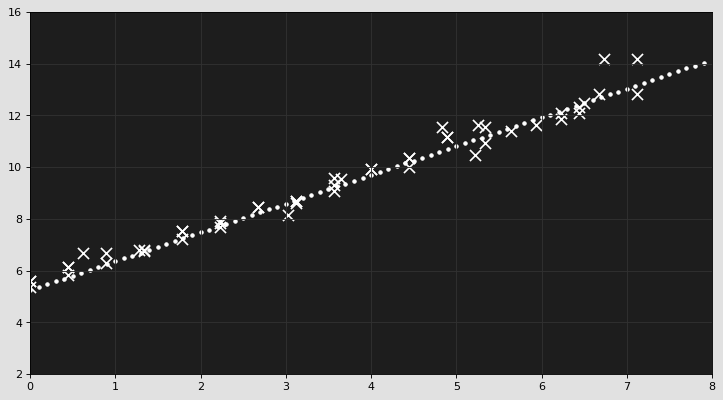

In [9]:
fig = plt.figure(figsize=(11, 6), dpi=80, facecolor='#e1e1e1')
ax = fig.add_subplot(111)
ax.set_facecolor('#1d1d1d')

ax.scatter(inp, out, marker='x', c='w', s=100)
ax.scatter(x_range, y_range, marker='.', c='w')

plt.ylim((2, 16))
plt.xlim((0, 8))

plt.grid(color='#313131')

plt.show()

# Useful Links
***

1. [Wikipedia's Linear Regression Article](https://en.wikipedia.org/wiki/Linear_regression)
2. [Coursera Andrew Ng's Machine Learning Course ~ Week 1 & 2](https://www.coursera.org/)
3. [Wikipedia's Gradient Descent Article](https://en.wikipedia.org/wiki/Gradient_descent)
